### Banking Data set

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, classification_report

### Load the file

In [2]:
data=pd.read_csv('bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

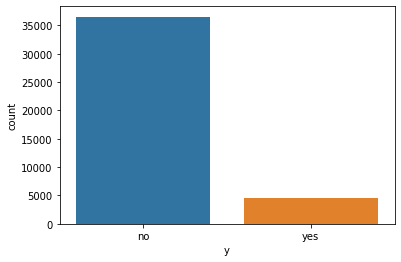

In [4]:
sns.countplot(data['y'])

In [5]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
a= data.corr()
a

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [7]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
cols=data.select_dtypes(include='object').columns

In [9]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()

In [10]:
for i in cols:
    data[i]=model.fit_transform(data[i])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [12]:
# feature_cols = abs(data.corr()['y']*100)
# [(abs(data.corr()['y']*100) > 5) 
#   & (abs(data.corr()['y']*100) < 100)]

In [13]:
abs(data.corr()['y'])>.05

age               False
job               False
marital           False
education          True
default            True
housing           False
loan              False
contact            True
month             False
day_of_week       False
duration           True
campaign           True
pdays              True
previous           True
poutcome           True
emp.var.rate       True
cons.price.idx     True
cons.conf.idx      True
euribor3m          True
nr.employed        True
y                  True
Name: y, dtype: bool

In [14]:
data.shape

(41188, 21)

In [15]:
data[data['y']== 0].shape

(36548, 21)

In [16]:
df_majority = data[data['y']== 0]
df_minority = data[data['y']== 1]

In [17]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(4640*2),    
                                 random_state=0) 

In [18]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
data = df_upsampled

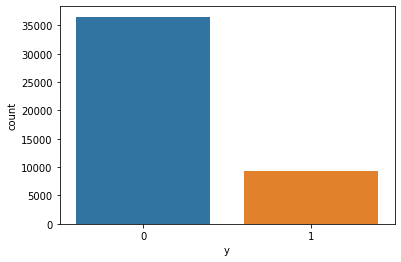

In [57]:
sns.countplot(data['y'])

In [19]:
y = data.y
X = data.drop('y', axis=1)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [22]:
fs1 = sfs(lr,k_features = 20,forward = True,cv = 3,verbose = 2)

In [23]:
result = fs1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.4s finished

[2019-11-13 20:52:00] Features: 1/20 -- score: 0.8314162835862097[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.2s finished

[2019-11-13 20:52:04] Features: 2/20 -- score: 0.8552637042453939[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.4s finished

[2019-11-13 20:52:08] Features: 3/20 -- score: 0.8665485027792247[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [24]:
sfs1 = sfs(lr,k_features = 14,forward = True,cv = 3,verbose = 2)
result = sfs1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.1s finished

[2019-11-13 20:53:50] Features: 1/14 -- score: 0.8314162835862097[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.8s finished

[2019-11-13 20:53:54] Features: 2/14 -- score: 0.8552637042453939[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.2s finished

[2019-11-13 20:53:57] Features: 3/14 -- score: 0.8665485027792247[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [25]:
feat_cols = result.k_feature_names_
feat_cols = list(feat_cols)
feat_cols

['age',
 'marital',
 'education',
 'housing',
 'loan',
 'month',
 'duration',
 'pdays',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

### Extract the independent variable X and dependent variable Y

In [26]:
y = data['y']
X =data[['age',
 'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']]

In [27]:
X.head()


,age,marital,default,housing,loan,contact,day_of_week,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,0,0,0,1,1,261,1,999,93.994,-36.4,4.857,5191.0
1,57,1,1,0,0,1,1,149,1,999,93.994,-36.4,4.857,5191.0
2,37,1,0,2,0,1,1,226,1,999,93.994,-36.4,4.857,5191.0
3,40,1,0,0,0,1,1,151,1,999,93.994,-36.4,4.857,5191.0
4,56,1,0,0,2,1,1,307,1,999,93.994,-36.4,4.857,5191.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [31]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [32]:
names = []
scores = []
TR_SCORE= []
TE_SCORE= []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuray Score': scores})
print(tr_split)

  Name  Accuray Score
0  KNN       0.880573
1   LR       0.875918
2   DT       0.925449
3  GNB       0.861881
4   RF       0.937668


In [33]:
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=0) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.777617
1   LR  0.789434
2   DT  0.656373
3  GNB  0.748511
4   RF  0.659186


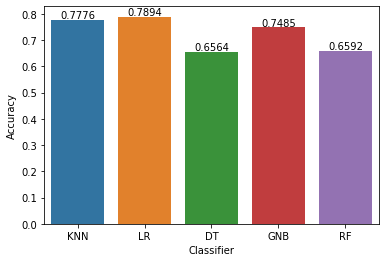

In [34]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

### Grid Search

In [35]:
random_state= list(range(0,20))
class_weight=['balanced',None]

In [36]:
param_grid= dict(random_state=random_state, class_weight=class_weight)
log= LogisticRegression()

In [37]:
grid= GridSearchCV(log,
    param_grid,
    scoring='accuracy',
    n_jobs=None,
    iid='warn',
    refit=True,
    cv=10,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score='raise-deprecating',
    return_train_score=False,)

grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced', None],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [38]:
print('best_score:',grid.best_score_)
print('best_param:',grid.best_params_)
print('best_estimator:',grid.best_estimator_)

best_score: 0.8352535567775159
best_param: {'class_weight': None, 'random_state': 0}
best_estimator: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [39]:
log = LogisticRegression(random_state= 0, class_weight =None)
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred=log.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [41]:
result=confusion_matrix(y_test, y_pred )
result

array([[10427,   502],
       [ 1204,  1616]], dtype=int64)

In [42]:
print('accuracy_score:',accuracy_score(y_test, y_pred ))
print('precision_score:',precision_score(y_test, y_pred ,  ))
print('recall_score:',recall_score(y_test, y_pred   ))

accuracy_score: 0.8759182485998982
precision_score: 0.7629839471199245
recall_score: 0.573049645390071


### Stacking

In [43]:
from vecstack import stacking
from xgboost import XGBClassifier 
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier

In [44]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),

    RandomForestClassifier(random_state=0, n_jobs=-1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3),
    
    LogisticRegression(random_state= 0, class_weight =None),
    AdaBoostClassifier( n_estimators=50, random_state= 0)
]

In [45]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.87381546]
    fold  1:  [0.87418953]
    fold  2:  [0.87718204]
    fold  3:  [0.87791495]
    ----
    MEAN:     [0.87577550] + [0.00179671]
    FULL:     [0.87577543]

model  1:     [RandomForestClassifier]
    fold  0:  [0.85236908]
    fold  1:  [0.84713217]
    fold  2:  [0.85124688]
    fold  3:  [0.85060481]
    ----
    MEAN:     [0.85033824] + [0.00195575]
    FULL:     [0.85033823]

model  2:     [XGBClassifier]
    fold  0:  [0.89625935]
    fold  1:  [0.89538653]
    fold  2:  [0.88566085]
    fold  3:  [0.89026063]
    ----
    MEAN:     [0.89189184] + [0.00426539]
    FULL:     [0.89189189]

model  3:     [LogisticRegression]
    fold  0:  [0.87443890]
    fold  1:  [0.87356608]
    fold  2:  [0.87019950]
    fold  3:  [0.87591969]
    ----
    MEAN:     [0.87353104] + [0.00209942]
    FULL:  

## USL

###  K- Mean

In [46]:
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=2).fit(X)

In [47]:
kmeans.cluster_centers_

array([[ 4.00320912e+01,  1.17077311e+00,  2.07293462e-01,
         1.07468506e+00,  3.25818857e-01,  3.67723114e-01,
         1.99726827e+00,  1.94677868e+02,  2.57045485e+00,
         9.99000000e+02,  9.35611748e+01, -4.05084074e+01,
         3.61661390e+00,  5.16749608e+03],
       [ 4.06333867e+01,  1.22380894e+00,  1.53391604e-01,
         1.05318232e+00,  3.28326973e-01,  2.43875415e-01,
         2.06561615e+00,  7.23123107e+02,  2.24399852e+00,
         6.98115967e+02,  9.35048379e+01, -4.01076203e+01,
         2.77458328e+00,  5.12378444e+03]])

In [48]:
y_pred=kmeans.labels_
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [49]:
result=confusion_matrix(y, y_pred)
result

array([[33777,  2771],
       [ 3907,  5373]], dtype=int64)

In [50]:
print('accuracy_score:',accuracy_score(y, y_pred ))
print('precision_score:',precision_score(y, y_pred , average='macro'))
print('recall_score:',recall_score(y, y_pred , average='macro' ))

accuracy_score: 0.8542812254516889
precision_score: 0.7780357776663722
recall_score: 0.7515844833718908


### Hierarchial Clustering 

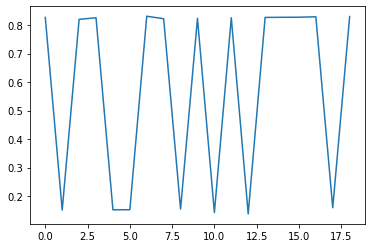

In [54]:
from sklearn.metrics import accuracy_score
accuracy = []
for i in range(1000,20000,1000):
    sample = data.sample(n=i,replace = False)
    X = sample.drop(['y'],axis = 1)
    y = sample['y']
    from sklearn.cluster import AgglomerativeClustering
    cluster = AgglomerativeClustering(n_clusters = 2,affinity = 'euclidean',linkage = 'ward')
    y_pred = cluster.fit_predict(X)
    accuracy.append(accuracy_score(y,y_pred))
plt.plot(accuracy)

In [55]:
y_pred=cluster.fit_predict(X)
result=confusion_matrix(y, y_pred)
result

array([[14932,   221],
       [ 3008,   839]], dtype=int64)

In [56]:
print('accuracy_score:',accuracy_score(y, y_pred ))
print('precision_score:',precision_score(y, y_pred , average='macro'))
print('recall_score:',recall_score(y, y_pred , average='macro' ))

accuracy_score: 0.8300526315789474
precision_score: 0.811919711406996
recall_score: 0.6017537245217918


### without scaling - PCA

In [59]:
from sklearn.decomposition import PCA
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
scores1 = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    scores1.append(precision_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuracy Score': scores, 'precision score': scores1 })
print(tr_split)

  Name  Accuracy Score  precision score
0  KNN        0.882610         0.718795
1   LR        0.875773         0.763009
2   DT        0.916794         0.766539
3  GNB        0.847989         0.668825
4   RF        0.935341         0.848179


### with scaling -PCA

In [58]:
# scale the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
scores1 = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    scores1.append(precision_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuracy Score': scores, 'precision score': scores1 })
print(tr_split)

  Name  Accuracy Score  precision score
0  KNN        0.882610         0.718795
1   LR        0.875773         0.763009
2   DT        0.917449         0.761402
3  GNB        0.845225         0.654602
4   RF        0.933086         0.845203
